In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('University of hertfordshire/Assignment 1/ev_charging_patterns.csv')
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [3]:
print(df.shape)


(1320, 20)


In [4]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


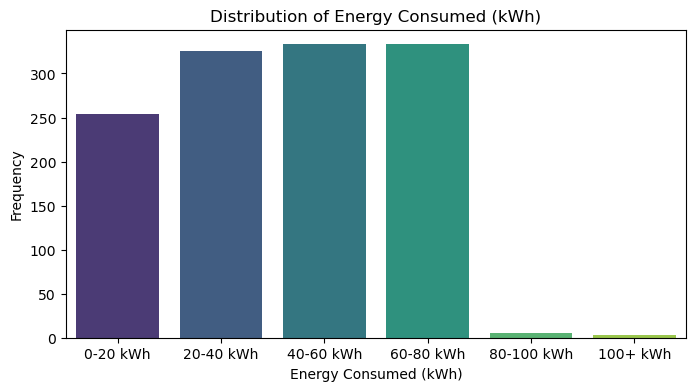

In [5]:
def plot_categorical_graph(df):
    """
    Creates a bar plot to display the frequency of Energy Consumed (kWh) in specific ranges.
    """
energy_bins = pd.cut(df["Energy Consumed (kWh)"], bins=[0, 20, 40, 60, 80, 100, df["Energy Consumed (kWh)"].max()], 
                         labels=["0-20 kWh", "20-40 kWh", "40-60 kWh", "60-80 kWh", "80-100 kWh", "100+ kWh"])
energy_counts = energy_bins.value_counts().sort_index()
    
plt.figure(figsize=(8, 4))
sns.barplot(x=energy_counts.index, y=energy_counts.values, palette="viridis")
plt.xlabel("Energy Consumed (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumed (kWh)")
plt.show()


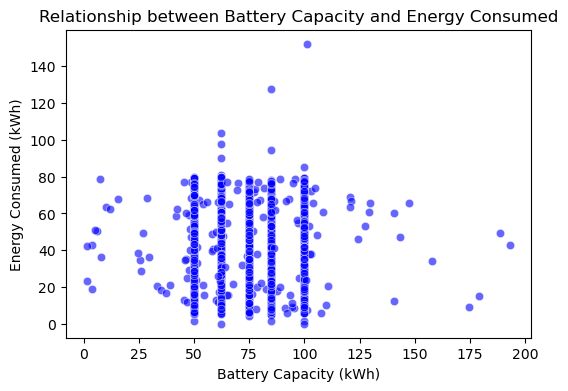

In [10]:
def plot_relational_graph(df):
    """
    Creates a scatter plot to visualize the relationship between 
    Battery Capacity (kWh) and Energy Consumed (kWh).
    """
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Battery Capacity (kWh)", y="Energy Consumed (kWh)", data=df, color="blue", alpha=0.6)
plt.title("Relationship between Battery Capacity and Energy Consumed")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

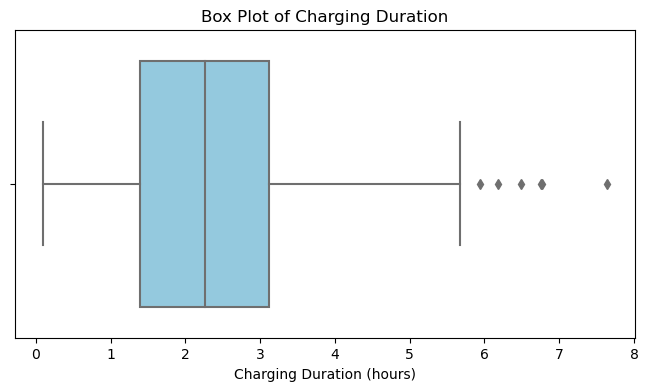

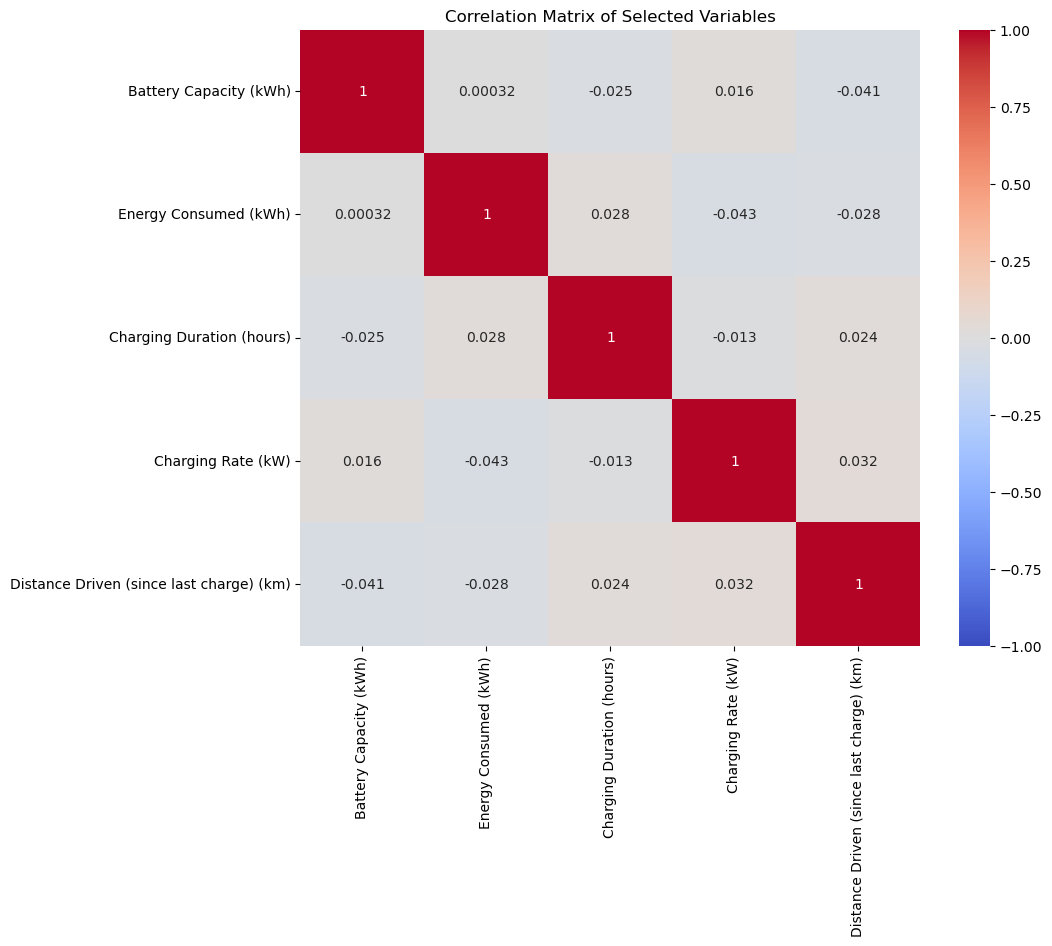

In [14]:
def plot_statistical_graph(df):
    """
    Creates a box plot for Charging Duration and a heatmap for the correlation matrix.
    """
# Box plot for Charging Duration
plt.figure(figsize=(8, 4))
sns.boxplot(x="Charging Duration (hours)", data=df, color="skyblue")
plt.title("Box Plot of Charging Duration")
plt.xlabel("Charging Duration (hours)")
plt.show()

# Correlation heatmap for selected variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[["Battery Capacity (kWh)", "Energy Consumed (kWh)", "Charging Duration (hours)",
                             "Charging Rate (kW)", "Distance Driven (since last charge) (km)"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Variables")
plt.show()

In [13]:
new_df = df.select_dtypes(include=['int','float'])
new_df.corr()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
Battery Capacity (kWh),1.000000,0.000323,-0.024824,0.015866,-0.000492,-0.072148,-0.011512,-0.041194,-0.036411,0.037673
Energy Consumed (kWh),0.000323,1.000000,0.028369,-0.042610,-0.007787,-0.013414,0.000600,-0.027948,-0.018509,0.017105
Charging Duration (hours),-0.024824,0.028369,1.000000,-0.013460,0.015902,-0.026016,0.006958,0.023644,-0.049575,0.001111
Charging Rate (kW),0.015866,-0.042610,-0.013460,1.000000,-0.000853,-0.019289,-0.018705,0.032209,0.012818,-0.050523
Charging Cost (USD),-0.000492,-0.007787,0.015902,-0.000853,1.000000,-0.008653,-0.063174,-0.008528,0.059864,-0.006487
State of Charge (Start %),-0.072148,-0.013414,-0.026016,-0.019289,-0.008653,1.000000,-0.021410,-0.023494,0.037751,0.016635
State of Charge (End %),-0.011512,0.000600,0.006958,-0.018705,-0.063174,-0.021410,1.000000,0.025574,0.022027,0.015671
Distance Driven (since last charge) (km),-0.041194,-0.027948,0.023644,0.032209,-0.008528,-0.023494,0.025574,1.000000,-0.023733,-0.031497
Temperature (°C),-0.036411,-0.018509,-0.049575,0.012818,0.059864,0.037751,0.022027,-0.023733,1.000000,0.026410
Vehicle Age (years),0.037673,0.017105,0.001111,-0.050523,-0.006487,0.016635,0.015671,-0.031497,0.026410,1.000000
